In [1]:
import pandas as pd

# Load CSV into dataframe
df = pd.read_csv ('tweets.csv')

In [2]:
df.head()

,tweet_text,created_at,place,context_annotations,city
0,kemana kamu nak alirkan air dari kota kemuning...,2022-01-01 14:33:48+00:00,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...",[]
1,#DaruratBanjir\r\n#Johor https://t.co/Nxy7oMWwkr,2022-01-01 14:33:26+00:00,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...",[]
2,"menteri fed &amp; state &amp; exco ,\r\nsement...",2022-01-01 14:31:39+00:00,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...",[]
3,#DaruratBanjir #BenderaPutih #RakyatJagaRakyat...,2022-01-01 14:22:17+00:00,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...",[]
4,Bantuan RM2500 untuk membeli barang2 keperluan...,2022-01-01 14:18:25+00:00,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...",[]


## Most mentioned word in Word Cloud

In [3]:
%%time
# Reference : https://malaya.readthedocs.io/en/latest/Api.html#module-malaya.preprocessing
import malaya

tokenizer = malaya.preprocessing.Tokenizer(hashtags= False)
extracbas = malaya.stem.deep_model()
tweetlist = []

for tweet in df['tweet_text']:
    tkn = tokenizer.tokenize(tweet)
    for t in tkn:
        tkn = malaya.preprocessing.unpack_english_contractions(t)
        basetkn = extracbas.stem(tkn,beam_search= False)
    tweetlist.append(basetkn)

tweetlist


ModuleNotFoundError: No module named 'malaya'

In [4]:
# Set Custom Stopwords
from nltk.corpus import stopwords

new_words = ["co","http","di","yang","dan","amp","ini", "untuk", "n", "ni", "ada", "kami", "yg", "ke", "1", "2", "nak", "daruratbanjir", "3", "lagi", "tak", "kita"]
stop_words = set(stopwords.words('english'))
stop_words = stop_words.union(set(new_words))

In [5]:
#Define function to lemmatise data and add stop word

import nltk
def cleanData(raw_text):    
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    from nltk.tokenize import RegexpTokenizer
    from nltk.stem.wordnet import WordNetLemmatizer
    
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    words = tokenizer.tokenize(raw_text)

    wordsFiltered=[]
    for word in words:
        if word.lower() not in stop_words:
            wordsFiltered.append(word)
    
    lem = WordNetLemmatizer()
    wordsLemmatized=[]
    #Lemmatisation
    for word in wordsFiltered:
        wordsLemmatized.append(lem.lemmatize(word))
    
#   Convert to lowercase
    str=''
    for w in wordsLemmatized:
        str = str+' '+w.lower()
    return str

In [6]:
# Observe stopwords and add to new_words
import pandas

df_word = df.apply(lambda row:cleanData(row['tweet_text']), axis = 1) # apply function to each tweet_t
freq = pandas.Series(''.join(df_word).split()).value_counts()[0:40]
print(freq)

http                6523
banjir              2888
malaysia            1921
bantuan             1279
flood                875
mangsa               872
banjir2021           786
rakyatjagarakyat     738
benderaputih         517
kepada               453
bagi                 423
pahang               419
boleh                401
misi                 401
sumbangan            392
rakyat               387
semua                386
rumah                383
terima               381
keluargamalaysia     373
dengan               350
dari                 345
rt                   345
help                 341
kerajaan             329
keluarga             324
kasih                320
bencana              315
team                 298
mereka               290
bantu                289
perlu                289
membantu             285
selangor             284
contact              277
akan                 275
muda                 273
air                  271
kitajagakita         266
sukarelawan          262


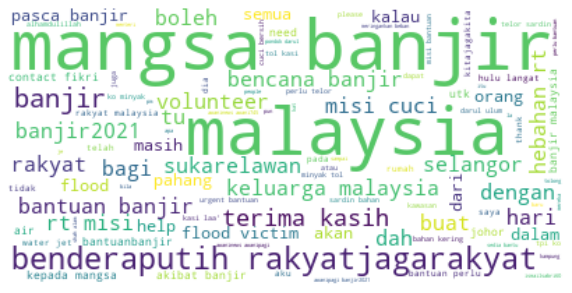

In [7]:
# Create Wordcloud and Save

import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

#used to convert data element into list
abstract = df_word.values.tolist() 

# Create wordcloud
wordcloud = WordCloud(background_color='white', stopwords=stop_words, max_words=100,max_font_size=50, random_state=42).generate(str(abstract))

# Display the generated image:
plt.figure(figsize=(10,10)) #inches
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

plt.show()

# Save wordcloud to django static folder
path = os.getcwd() + r"\WeWarnYou-dashboard\apps\static\assets\wc-word.png"
wordcloud.to_file(path)

## Most mentioned city in Word Cloud

In [8]:
# Remove empty bracket city
df_city = df[df.city != "[]"]

# Remove empty value city
df_city = df_city.dropna(subset=['city'])

df_city

,tweet_text,created_at,place,context_annotations,city
23,Terima kasih Segamat Comrade 🙌\r\n#DaruratBanj...,2022-01-01 12:54:11+00:00,NaN,"[{'domain': {'id': '131', 'name': 'Unified Twi...",['Segamat']
25,"Kuantan, Pahang.\r\n\r\nSebanyak 300 set banta...",2022-01-01 12:40:58+00:00,NaN,"[{'domain': {'id': '131', 'name': 'Unified Twi...",['Kuantan']
36,"Kampung Labohan Dagang, Selangor.\r\n\r\n50 se...",2022-01-01 12:24:09+00:00,NaN,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",['Banting']
40,Misi bantuan #ProjekDapo hari ini dilakukan di...,2022-01-01 12:02:59+00:00,NaN,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",['Segamat']
61,Update #DaruratBanjir bahagian Kg Asahan Kuala...,2022-01-01 10:40:23+00:00,NaN,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",['Kuala Selangor']
...,...,...,...,...,...
7295,KERAJAAN HULUR BANTUAN KEPADA MANGASA BANJIR B...,2022-01-13 03:02:57+00:00,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...",['Putrajaya']
7296,"KERAJAAN PRIHATIN, LANCARKAN INISIATIF BAGI ME...",2022-01-13 03:00:55+00:00,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...",['Putrajaya']
7299,"JANGAN RISAU, KERAJAAN AKAN GANTI BUKU TEKS YA...",2022-01-13 02:52:47+00:00,NaN,"[{'domain': {'id': '123', 'name': 'Ongoing New...",['Putrajaya']
7319,KERAJAAN PERUNTUKAN RM50 JUTA UNTUK INISIATIF ...,2022-01-12 23:46:16+00:00,NaN,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",['Putrajaya']


In [9]:
# Cleaning city data from "['Putrajaya']" become "Putrajaya" & Add to an empty wc_city list

import re

wc_city_list = []
characters_to_remove = "\[\]\'"
pattern = "[" + characters_to_remove + "]"

for city in df_city['city']:
    wc_city_list.extend(re.sub(pattern, "", city).split(','))

print(wc_city_list)

['Segamat', 'Kuantan', 'Banting', 'Segamat', 'Kuala Selangor', 'Muar', ' Segamat', 'Klang', 'Alor Gajah', 'Sepang', 'Tampin', 'Shah Alam', 'Labis', 'Klang', ' Shah Alam', 'Tampin', ' Pulau Sebang', 'Ipoh', 'Gua Musang', 'Gua Musang', 'Gua Musang', 'Segamat', 'Paka', 'Tanah Merah', 'Kuantan', 'Shah Alam', 'Jerantut', 'Subang Jaya', 'Banting', 'Shah Alam', ' Sepang', 'Jerantut', 'Kuantan', 'Kuala Lumpur', 'Sepang', 'Kuala Lumpur', 'Kuantan', 'Klang', 'Shah Alam', 'Kuala Sungai Baru', 'Shah Alam', 'Victoria', 'Semenyih', 'Kuala Lipis', 'Klang', ' Shah Alam', 'Teluk Intan', 'Teluk Intan', 'Kuantan', 'Kuala Selangor', 'Banting', 'Sepang', 'Paka', 'Shah Alam', 'Subang Jaya', ' Shah Alam', 'Kuantan', 'Sepang', 'Kuala Selangor', 'Kuala Selangor', 'Shah Alam', 'Kuantan', 'Kuantan', 'Shah Alam', 'Sepang', 'Kuala Selangor', 'Kuala Selangor', 'Banting', 'Teluk Intan', 'Kuantan', 'Shah Alam', 'Paka', 'Shah Alam', 'Klang', 'Semenyih', ' Batu Gajah', 'Kuantan', 'Subang Jaya', 'Banting', 'Shah Alam', 

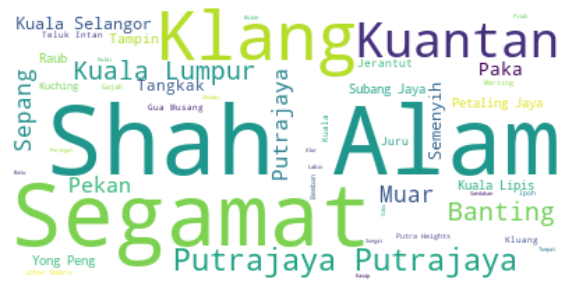

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc_city = (" ").join(wc_city_list)
wordcloud = WordCloud(background_color="white", repeat=False).generate(wc_city)

# Display the generated image:
plt.figure(figsize=(10,10)) #inches
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

plt.show()

# Save wordcloud to django static folder
path = os.getcwd() + r"\WeWarnYou-dashboard\apps\static\assets\wc-location.png"
wordcloud.to_file(path)

## Count of flood-related hashtag against time line graph

In [11]:
# Split timestamp into date and timestamp
timestamp = df["created_at"].str.split(" ", n = 1, expand = True)
df["date"] = pd.to_datetime(timestamp[0])
df["time"] = timestamp[1]

In [12]:
# Group the tweets by date into new dataframe
df_count = df.groupby(df.date.dt.floor('1D')).count()
df_count

,tweet_text,created_at,place,context_annotations,city,date,time
date,,,,,,,
2021-12-25,308,308,21,308,308,308,308
2021-12-26,1264,1264,83,1264,1264,1264,1264
2021-12-27,997,997,57,997,997,997,997
2021-12-28,631,631,13,631,631,631,631
2021-12-29,419,419,21,419,419,419,419
2021-12-30,322,322,14,322,322,322,322
2021-12-31,238,238,9,238,238,238,238
2022-01-01,187,187,6,187,187,187,187
2022-01-03,49,49,1,49,49,49,49


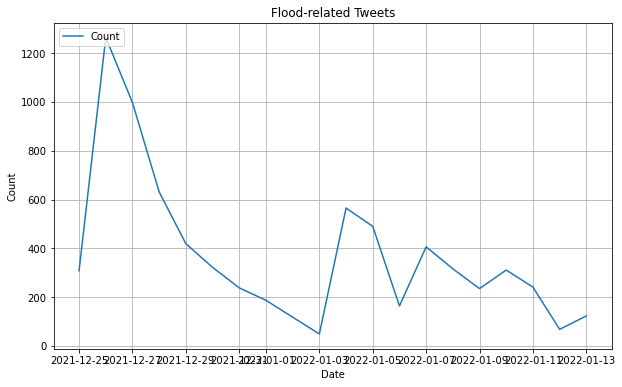

In [13]:
# Convention for import of the pyplot interface
import matplotlib.pyplot as plt

# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df_count.tweet_text, color='tab:blue', label='Count')

# Same as above
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Flood-related Tweets')
ax.grid(True)
ax.legend(loc='upper left');


# Save line graph to django static folder
path = os.getcwd() + r"\WeWarnYou-dashboard\apps\static\assets\flood-trend.png"
plt.savefig(path)

## Most mentioned party in tweets

In [14]:
# Declare Malaysia Party, as of Jan 2022

df_party = pd.DataFrame([
    ['PH', 'DAP'],['PH', 'PKR'],['PH', 'AMANAH'],
    ['PN', 'BERSATU'],['PN', 'PAS'],['PN', 'GERAKAN'],
    ['BN', 'UMNO'],['BN', 'MCA'],['BN', 'MIS']
], columns=['Party','Member'])

df_party

,Party,Member
0,PH,DAP
1,PH,PKR
2,PH,AMANAH
3,PN,BERSATU
4,PN,PAS
5,PN,GERAKAN
6,BN,UMNO
7,BN,MCA
8,BN,MIS


In [15]:
# Count how many times those party were mentioned

# Declare empty list
count = []

for member in df_party['Member']:
    
    # Create a regex for the party to search for uppercase and lowercase and must have space before and after
    # For eg, DAP -> "\sDAP|dap\s"
    reg = "\s" + member + "|" + member.lower() + "\s"
    s = df['tweet_text'].str.count(reg).sum()
    count.append(s)
    
df_party['Count'] = count
df_party

,Party,Member,Count
0,PH,DAP,40
1,PH,PKR,4
2,PH,AMANAH,15
3,PN,BERSATU,3
4,PN,PAS,147
5,PN,GERAKAN,21
6,BN,UMNO,23
7,BN,MCA,23
8,BN,MIS,25


In [16]:
# Following nested chart are reference through this site
# Ref 1 - https://stackoverflow.com/questions/67210640/how-can-i-draw-a-nested-pie-graph-in-matplotlib-in-python
# Ref 2 - https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html

In [17]:
df_party_outer = df_party.groupby(['Party']).sum()
df_party_outer

,Count
Party,
BN,71
PH,59
PN,171


In [18]:
df_party_inner = df_party.groupby(['Party', 'Member']).sum()

df_party_inner

Count
Party Member        
BN    MCA         23
      MIS         25
      UMNO        23
PH    AMANAH      15
      DAP         40
      PKR          4
PN    BERSATU      3
      GERAKAN     21
      PAS        147

In [19]:
# Define inner labels for inner pie chart
inner_labels = df_party_inner.index.get_level_values(1)
inner_labels

Index(['MCA', 'MIS', 'UMNO', 'AMANAH', 'DAP', 'PKR', 'BERSATU', 'GERAKAN',
       'PAS'],
      dtype='object', name='Member')

In [21]:
import numpy as np

# Define color for pie chart
cmap = plt.cm.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 3, 4, 5, 6, 8, 9, 10])

In [22]:
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

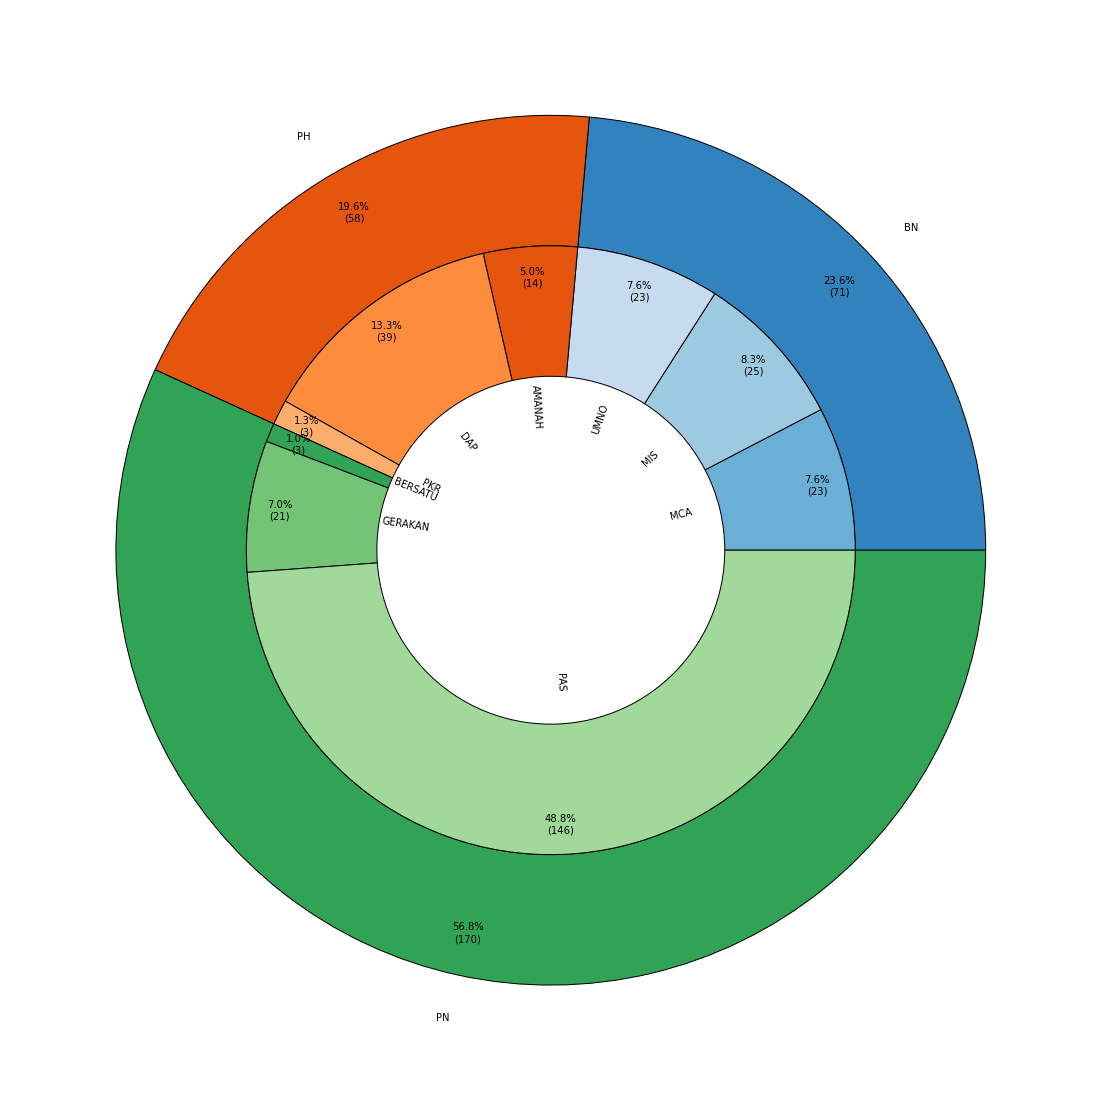

In [23]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(40,20))
size = 0.3

ax.pie(df_party_outer.values.flatten(), radius=1,
       labels=df_party_outer.index,
       autopct = lambda pct: func(pct, df_party_outer),
       pctdistance = 0.9,
       colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='black'))

ax.pie(df_party_inner.values.flatten(), radius=1-size, 
       labels = inner_labels,
       autopct = lambda pct: func(pct, df_party_inner),
       pctdistance = 0.9,
       colors=inner_colors,
       labeldistance = 0.4,
       rotatelabels = True,
       wedgeprops=dict(width=size, edgecolor='black'))

# Save pie chart to django static folder
path = os.getcwd() + r"\WeWarnYou-dashboard\apps\static\assets\pc-party.png"

plt.savefig(path, bbox_inches="tight")

#plt.show()